美国国立卫生研究院指南定义心血管代谢指包括以下特征：

大腰围 — 女性腰围至少为 89 厘米（35 英寸），男性为 102 厘米（40 英寸）

高甘油三酯水平，在血液中发现这类脂肪处于 150 毫克每分升（mg/dL）也就是 1.7 毫摩尔每升（mmol/L）或更高

“好”或 HDL 胆固醇低 — 男性低于 40 mg/dL>（1.04 mmol/L）或女性低于 50 mg/dL（1.3 mmol/L）高密度脂蛋白胆固醇（HDL）

血压升高 — 130/85 毫米汞柱（mm Hg）或更高

空腹血糖升高 — 100 mg/dL（5.6 mmol/L）或更高

确定该年的数据是否含有糖尿病，高血糖，高血压，高胆固醇，以及BMI，等代谢指标，所有年份的数据均不包括腰围

In [16]:
import pyreadstat
import os
import re

# 目标列关键词
target_columns = ['DIABETE', 'BPHIGH', 'TOLDHI', '_BMI']

# 文件夹路径
folder_path = 'C:/Users/lyr/Desktop/brfss/data'  

# 遍历XPT文件
for filename in os.listdir(folder_path):
    if filename.endswith('.XPT') or filename.endswith('.xpt'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # 读取XPT文件
            df, meta = pyreadstat.read_xport(file_path, encoding="ISO-8859-1")
            
            # 获取列名
            columns = df.columns
            
            # 处理目标列检查逻辑
            missing_columns = []
            for col in target_columns:
                if col == 'DIABETE':
                    # PDIABTS 或 PDIABTST 存在一个即可
                    exists = any(re.search(r"^DIABETE\d*$|^DIABETES\d*$", column) for column in columns)
                else:
                    # 普通匹配
                    exists = any(re.search(f"^{col}\\d*$", column) for column in columns)
                
                if not exists:
                    missing_columns.append(col)
            
            # 输出结果
            if not missing_columns:
                print(f"{filename} 包含所有目标列")
            else:
                print(f"{filename} 不包含以下目标列: {', '.join(missing_columns)}")
        
        except Exception as e:
            print(f"{filename} 读取失败: {e}")



CDBRFS01.XPT 包含所有目标列
cdbrfs02.XPT 包含所有目标列
cdbrfs03.XPT 包含所有目标列
CDBRFS04.XPT 包含所有目标列
CDBRFS05.XPT 包含所有目标列
CDBRFS06.XPT 不包含以下目标列: BPHIGH, TOLDHI
CDBRFS07.XPT 包含所有目标列
CDBRFS08.XPT 不包含以下目标列: BPHIGH, TOLDHI
CDBRFS09.XPT 包含所有目标列
CDBRFS10.XPT 不包含以下目标列: BPHIGH, TOLDHI
LLCP2011.XPT 包含所有目标列
LLCP2012.XPT 不包含以下目标列: BPHIGH, TOLDHI
LLCP2013.XPT 包含所有目标列
LLCP2014.XPT 不包含以下目标列: BPHIGH, TOLDHI
LLCP2015.XPT 包含所有目标列
LLCP2016.XPT 不包含以下目标列: BPHIGH, TOLDHI
LLCP2017.XPT 包含所有目标列
LLCP2018.XPT 不包含以下目标列: BPHIGH, TOLDHI
LLCP2019.XPT 包含所有目标列
LLCP2020.XPT 不包含以下目标列: BPHIGH, TOLDHI
LLCP2021.XPT 包含所有目标列
LLCP2022.XPT 不包含以下目标列: BPHIGH, TOLDHI
LLCP2023.XPT 包含所有目标列


确定01，02，03，04，05，07，09，11，13，15，17，19，21，23十四年有以上全部四项指标，判断是否可以提取完整基线以及代谢数据

In [50]:
import pyreadstat
import os
import re

# 目标变量名（不包含数字）
target_columns = [
    'DISPCODE', 'SEXVAR', 'DIABETE', 'EDUCA', 'EMPLOY', 'INCOME', 
    'WEIGHT',  'BPHIGH',  'TOLDHI', 'CNCRTYP', 
    '_RFHYPE', '_RFCHOL', '_SMOKER', 'SEQNO'
]

# 文件夹路径
folder_path = 'C:/Users/lyr/Desktop/brfss/data'  # 替换为实际路径

# 遍历XPT文件
for filename in os.listdir(folder_path):
    if filename.endswith('.XPT') or filename.endswith('.xpt'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # 读取XPT文件
            df, meta = pyreadstat.read_xport(file_path, encoding="ISO-8859-1")
            
            # 获取列名
            columns = df.columns
            
            # 去掉末尾的数字并查找匹配的列
            cleaned_columns = [re.sub(r'\d+$', '', col) for col in columns]  # 去掉末尾的数字
            
            # 提取目标列并检查是否存在
            missing_columns = []
            for target in target_columns:
                if target == 'CNCRTYP':
                    # CNCRTYP 或 CNCRTYPE 及其后缀数字形式
                    matched_columns = [col for col in cleaned_columns if col == 'CNCRTYP' or col == 'CNCRTYPE']
                elif target == 'SEXVAR':
                    # SEXVAR 或 SEX 及其后缀数字形式
                    matched_columns = [col for col in cleaned_columns if col == 'SEXVAR' or col == 'SEX']
                else:
                    # 普通目标列
                    matched_columns = [col for col in cleaned_columns if col == target]
                
                if not matched_columns:
                    missing_columns.append(target)
            
            # 输出缺失的列
            if missing_columns:
                print(f"{filename} 不包含以下目标列: {', '.join(missing_columns)}")
            else:
                print(f"{filename} 包含所有目标列")
        
        except Exception as e:
            print(f"{filename} 读取失败: {e}")



CDBRFS01.XPT 不包含以下目标列: DIABETE, CNCRTYP
cdbrfs02.XPT 不包含以下目标列: DIABETE, CNCRTYP, _RFHYPE, _RFCHOL
cdbrfs03.XPT 不包含以下目标列: DIABETE, CNCRTYP
CDBRFS04.XPT 不包含以下目标列: CNCRTYP, _RFHYPE, _RFCHOL
CDBRFS05.XPT 不包含以下目标列: CNCRTYP
CDBRFS07.XPT 不包含以下目标列: CNCRTYP
CDBRFS09.XPT 包含所有目标列
LLCP2011.XPT 不包含以下目标列: CNCRTYP
LLCP2013.XPT 不包含以下目标列: CNCRTYP
LLCP2015.XPT 不包含以下目标列: CNCRTYP
LLCP2017.XPT 包含所有目标列
LLCP2019.XPT 包含所有目标列
LLCP2021.XPT 包含所有目标列
LLCP2023.XPT 包含所有目标列


查证codebook确定07年以前不调查具体的癌症种类，11-16年肿瘤与血压胆固醇调查是交错进行的，可以合并的包括09，17，19，21，23年共五年的数据，接下来合并所有的数据并且统一变量名称


In [83]:
import pyreadstat
import os
import re
import pandas as pd

# 目标变量名（不包含数字）
target_columns = [
    'DISPCODE', 'SEXVAR', 'DIABETE', 'EDUCA', 'EMPLOY', 'INCOME', 
    'WEIGHT',  'BPHIGH',  'TOLDHI', 'CNCRTYP', '_BMI', 
    '_RFHYPE', '_RFCHOL', '_SMOKER', 'SEQNO'
]

# 目标列的统一格式映射
standard_column_names = {
    'SEXVAR': 'SEX', 
    'CNCRTYP': 'CNCRTYPE', 
    '_BMI': 'BMI',
    '_SMOKER': 'SMOKER',
    '_RFHYPE': 'RFHYPE',
    '_RFCHOL': 'RFHOL'  # 统一列名
}

# 文件夹路径
folder_path = 'C:/Users/lyr/Desktop/brfss/data'  # 替换为实际路径

# 用于存储所有处理过的DataFrame
all_data = []

# 遍历文件夹中的所有XPT文件
for filename in os.listdir(folder_path):
    if filename.endswith('.XPT') or filename.endswith('.xpt'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # 尝试读取 XPT 文件
            df, meta = pyreadstat.read_xport(file_path, encoding="ISO-8859-1")
            
            # 确保列名统一并去除可能的空格
            df.columns = df.columns.str.strip()  # 去掉列名中的空格
            df.columns = df.columns.str.upper()  # 转换为大写字母
            
            # 打印文件的列名和数据（检查格式和实际内容）
            print(f"\n正在处理文件: {filename}")
            print(f"文件中的列名：{df.columns}")
            print(f"文件的前几行数据：\n{df.head()}")
            
            # 创建列名映射，匹配目标变量并去除数字后缀
            column_mapping = {}
            for col in df.columns:
                for target in target_columns:
                    # 如果列名已经符合目标列名，则直接保留原列名
                    if col == standard_column_names.get(target, target):
                        column_mapping[col] = col
                    elif re.match(f'^{target}(\\d+)?$', col):
                        # 使用标准名称（去掉后缀）并更新映射
                        new_name = standard_column_names.get(target, target)
                        column_mapping[col] = new_name
            
            # 打印列名映射，检查是否有遗漏
            print(f"映射后的列名：{column_mapping}")
            
            # 重命名列
            df.rename(columns=column_mapping, inplace=True)
            
            # 选择目标列
            selected_columns = [col for col in df.columns if col in column_mapping.values()]
            selected_df = df[selected_columns]
            
            # 确认 CNCRTYPE 列数据是否正常
            if 'CNCRTYPE' in selected_df.columns:
                print(f"CNCRTYPE 列的前几行数据: \n{selected_df['CNCRTYPE'].head()}")  # 打印 CNCRTYPE 的内容
                cncrtyp_values = selected_df['CNCRTYPE']
                
                if filename == 'CDBRFS09.XPT':
                    selected_df['bladdercancer'] = (cncrtyp_values == 24).astype(int)
                elif filename in ['LLCP2017.XPT', 'LLCP2019.XPT', 'LLCP2021.XPT']:
                    selected_df['bladdercancer'] = (cncrtyp_values == 25).astype(int)
                elif filename == 'LLCP2023.XPT':
                    selected_df['bladdercancer'] = (cncrtyp_values == 1).astype(int)
                else:
                    selected_df['bladdercancer'] = 0
            else:
                selected_df['bladdercancer'] = 0

            # 将处理后的数据添加到列表
            all_data.append(selected_df)
        
        except Exception as e:
            print(f"读取文件 {filename} 时出错: {e}")

# 合并所有表格
if all_data:
    merged_df = pd.concat(all_data, ignore_index=True)
    
    # 打印合并后的前十行
    print("\n合并后的前十行数据:")
    print(merged_df.head())
    
    # 保存为XPT格式
    output_file = 'C:/Users/lyr/Desktop/brfss/merge/brfss_bladdercancer.XPT'  # 替换为实际保存路径
    pyreadstat.write_xport(merged_df, output_file)
    print(f"数据已合并并保存为 {output_file}")
else:
    print("没有有效的数据可以合并")



正在处理文件: CDBRFS09.XPT
文件中的列名：Index(['_STATE', '_GEOSTR', '_DENSTR2', 'PRECALL', 'REPNUM', 'REPDEPTH',
       'FMONTH', 'IDATE', 'IMONTH', 'IDAY',
       ...
       '_POSTCH', '_CHILDWT', '_RAWHH', '_WT2HH', '_POSTHH', '_HOUSEWT',
       'POPSIZE', 'CT10000', 'KEEPCHIM', 'KEEPRCSM'],
      dtype='object', length=405)
文件的前几行数据：
   _STATE  _GEOSTR  _DENSTR2  PRECALL    REPNUM  REPDEPTH  FMONTH     IDATE  \
0     1.0      8.0       1.0      1.0  120095.0      15.0    12.0  12232009   
1     1.0      9.0       2.0      1.0  120111.0      22.0    12.0  12232009   
2     1.0     15.0       1.0      1.0   30148.0       1.0     3.0  03162009   
3     1.0     15.0       1.0      1.0  120185.0       2.0    12.0  12212009   
4     1.0      7.0       1.0      1.0   20070.0      10.0     2.0  03032009   

  IMONTH IDAY  ... _POSTCH _CHILDWT  _RAWHH     _WT2HH   _POSTHH    _HOUSEWT  \
0     12   23  ...     NaN      NaN     1.0  78.304330  5.156850  403.803705   
1     12   23  ...     NaN      NaN  

C:\Users\lyr\AppData\Local\Temp\ipykernel_10096\1911964813.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['bladdercancer'] = (cncrtyp_values == 24).astype(int)



正在处理文件: LLCP2017.XPT
文件中的列名：Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_PA300R2', '_PA30021', '_PASTRNG', '_PAREC1', '_PASTAE1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=358)
文件的前几行数据：
   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  01302017     01   30  2017    1100.0  2017000001   
1     1.0     1.0  01122017     01   12  2017    1100.0  2017000002   
2     1.0     1.0  01102017     01   10  2017    1100.0  2017000003   
3     1.0     1.0  02082017     02   08  2017    1200.0  2017000004   
4     1.0     1.0  01302017     01   30  2017    1100.0  2017000005   

           _PSU  CTELENM1  ...  _PA300R2  _PA30021  _PASTRNG  _PAREC1  \
0  2.017000e+09       1.0  ...       1.0       1.0       1.0      1.0   
1  2.017000e+09       1.0  ...       1.0       1.0       1.0      1.0   
2  2.017000e+09       1.0

C:\Users\lyr\AppData\Local\Temp\ipykernel_10096\1911964813.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['bladdercancer'] = (cncrtyp_values == 25).astype(int)



正在处理文件: LLCP2019.XPT
文件中的列名：Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_VEGESU1', '_FRTLT1A', '_VEGLT1A', '_FRT16A', '_VEG23A', '_FRUITE1',
       '_VEGETE1', '_FLSHOT7', '_PNEUMO3', '_AIDTST4'],
      dtype='object', length=342)
文件的前几行数据：
   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  01182019     01   18  2019    1100.0  2019000001   
1     1.0     1.0  01132019     01   13  2019    1100.0  2019000002   
2     1.0     1.0  01182019     01   18  2019    1100.0  2019000003   
3     1.0     1.0  01182019     01   18  2019    1200.0  2019000004   
4     1.0     1.0  01042019     01   04  2019    1100.0  2019000005   

           _PSU  CTELENM1  ...  _VEGESU1  _FRTLT1A  _VEGLT1A  _FRT16A  \
0  2.019000e+09       1.0  ...     114.0       1.0       1.0      1.0   
1  2.019000e+09       1.0  ...     121.0       1.0       1.0      1.0   
2  2.019000e+09       1.0 

C:\Users\lyr\AppData\Local\Temp\ipykernel_10096\1911964813.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['bladdercancer'] = (cncrtyp_values == 25).astype(int)



正在处理文件: LLCP2021.XPT
文件中的列名：Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_FRTRES1', '_VEGRES1', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A',
       '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'],
      dtype='object', length=303)
文件的前几行数据：
   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  01192021     01   19  2021    1100.0  2021000001   
1     1.0     1.0  01212021     01   21  2021    1100.0  2021000002   
2     1.0     1.0  01212021     01   21  2021    1100.0  2021000003   
3     1.0     1.0  01172021     01   17  2021    1100.0  2021000004   
4     1.0     1.0  01152021     01   15  2021    1100.0  2021000005   

           _PSU  CTELENM1  ...  _FRTRES1  _VEGRES1  _FRUTSU1  _VEGESU1  \
0  2.021000e+09       1.0  ...       1.0       1.0     100.0     214.0   
1  2.021000e+09       1.0  ...       1.0       1.0     100.0     128.0   
2  2.021000e+09       1

C:\Users\lyr\AppData\Local\Temp\ipykernel_10096\1911964813.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['bladdercancer'] = (cncrtyp_values == 25).astype(int)



正在处理文件: LLCP2023.XPT
文件中的列名：Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       'DROCDY4_', '_RFBING6', '_DRNKWK2', '_RFDRHV8', '_FLSHOT7', '_PNEUMO3',
       '_AIDTST4', '_RFSEAT2', '_RFSEAT3', '_DRNKDRV'],
      dtype='object', length=350)
文件的前几行数据：
   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  03012023     03   01  2023    1100.0  2023000001   
1     1.0     1.0  01062023     01   06  2023    1100.0  2023000002   
2     1.0     1.0  03082023     03   08  2023    1100.0  2023000003   
3     1.0     1.0  03062023     03   06  2023    1100.0  2023000004   
4     1.0     1.0  01062023     01   06  2023    1100.0  2023000005   

           _PSU  CTELENM1  ...  DROCDY4_  _RFBING6  _DRNKWK2  _RFDRHV8  \
0  2.023000e+09       1.0  ...       0.0       1.0       0.0       1.0   
1  2.023000e+09       1.0  ...       0.0       1.0       0.0       1.0   
2  2.023000e+09      

C:\Users\lyr\AppData\Local\Temp\ipykernel_10096\1911964813.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['bladdercancer'] = (cncrtyp_values == 1).astype(int)



合并后的前十行数据:
   DISPCODE         SEQNO  DIABETE  BPHIGH  TOLDHI  EDUCA  EMPLOY  INCOME  \
0     120.0  2009055575.0      3.0     1.0     1.0    4.0     1.0     6.0   
1     120.0  2009056782.0      3.0     1.0     2.0    6.0     7.0     8.0   
2     120.0  2009013651.0      1.0     3.0     1.0    4.0     8.0     4.0   
3     120.0  2009063422.0      1.0     1.0     1.0    4.0     8.0     5.0   
4     120.0  2009005830.0      3.0     3.0     2.0    4.0     1.0     8.0   

   WEIGHT  SEX  CNCRTYPE  RFHYPE  RFHOL  SMOKER     BMI  bladdercancer  
0   200.0  1.0       NaN     2.0    2.0     3.0  2876.0              0  
1   175.0  1.0      20.0     2.0    1.0     1.0  2446.0              0  
2   240.0  1.0       2.0     1.0    2.0     1.0  3262.0              0  
3   220.0  1.0       NaN     2.0    2.0     3.0  3163.0              0  
4   156.0  2.0       NaN     1.0    1.0     4.0  2377.0              0  
数据已合并并保存为 C:/Users/lyr/Desktop/brfss/merge/brfss_bladdercancer.XPT


合并后的数据结果如下

In [75]:
df, meta = pyreadstat.read_xport('C:/Users/lyr/Desktop/brfss/merge/brfss_bladdercancer.XPT', encoding="ISO-8859-1")
print(df)

         DISPCODE         SEQNO  DIABETE  BPHIGH  TOLDHI  EDUCA  EMPLOY  \
0           120.0  2009055575.0      3.0     1.0     1.0    4.0     1.0   
1           120.0  2009056782.0      3.0     1.0     2.0    6.0     7.0   
2           120.0  2009013651.0      1.0     3.0     1.0    4.0     8.0   
3           120.0  2009063422.0      1.0     1.0     1.0    4.0     8.0   
4           120.0  2009005830.0      3.0     3.0     2.0    4.0     1.0   
...           ...           ...      ...     ...     ...    ...     ...   
2172902    1100.0    2023002064      3.0     1.0     1.0    5.0     1.0   
2172903    1100.0    2023002065      3.0     3.0     2.0    6.0     1.0   
2172904    1100.0    2023002066      3.0     3.0     1.0    6.0     1.0   
2172905    1100.0    2023002067      1.0     1.0     1.0    6.0     4.0   
2172906    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   

         INCOME  WEIGHT  SEX  CNCRTYPE  RFHYPE  RFHOL  SMOKER     BMI  \
0           6.0   200.0  1

统计膀胱癌患者的数量

In [76]:
df, meta = pyreadstat.read_xport('C:/Users/lyr/Desktop/brfss/merge/brfss_bladdercancer.XPT', encoding="ISO-8859-1")

# 统计 bladdercancer 列值为 1 的数量
bladdercancer_count = df['bladdercancer'].sum()

# 打印统计结果
print(f"膀胱癌患者的总数为：{bladdercancer_count}")

膀胱癌患者的总数为：1860.0


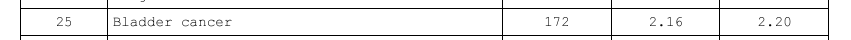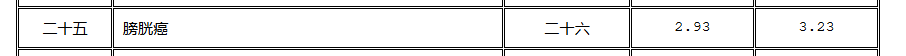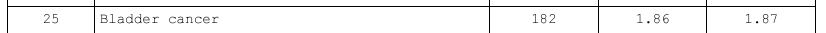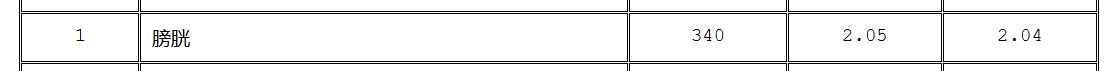
依次为09，17，19，21，23五年膀胱癌患者总数，1140+172+26+182+340 = 1860数量是吻合的

年龄存在一个问题是09年的数据只有5年一分组，之后的数据有具体的值，目前版本将五年一组的值取年龄的平均数

In [92]:
# 计算每个列的缺失值数量
missing_values = merged_df.isnull().sum()

# 计算每个列的缺失率
missing_percentage = (missing_values / len(merged_df)) * 100

# 将缺失值数量和缺失率组合成一个 DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# 打印各列的缺失率
print("各列的缺失率:")
print(missing_data)

各列的缺失率:
               Missing Values  Missing Percentage
DISPCODE                    0            0.000000
SEQNO                       0            0.000000
DIABETE                    21            0.000966
BPHIGH                     13            0.000598
TOLDHI                 220563           10.150595
EDUCA                     262            0.012058
EMPLOY                   9701            0.446453
INCOME                  27528            1.266874
WEIGHT                  37791            1.739191
SEX                         0            0.000000
CNCRTYPE              2079030           95.679659
RFHYPE                      0            0.000000
RFHOL                  268868           12.373654
SMOKER                      0            0.000000
BMI                    160036            7.365064
bladdercancer               0            0.000000


数据缺失情况基本在可接受范围内，胆固醇数据缺失值略高约为12%

ValueError: Could not interpret value `AGE` for `y`. An entry with this name does not appear in `data`.

C:\Users\lyr\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\lyr\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\lyr\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\lyr\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\lyr\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  func(*a

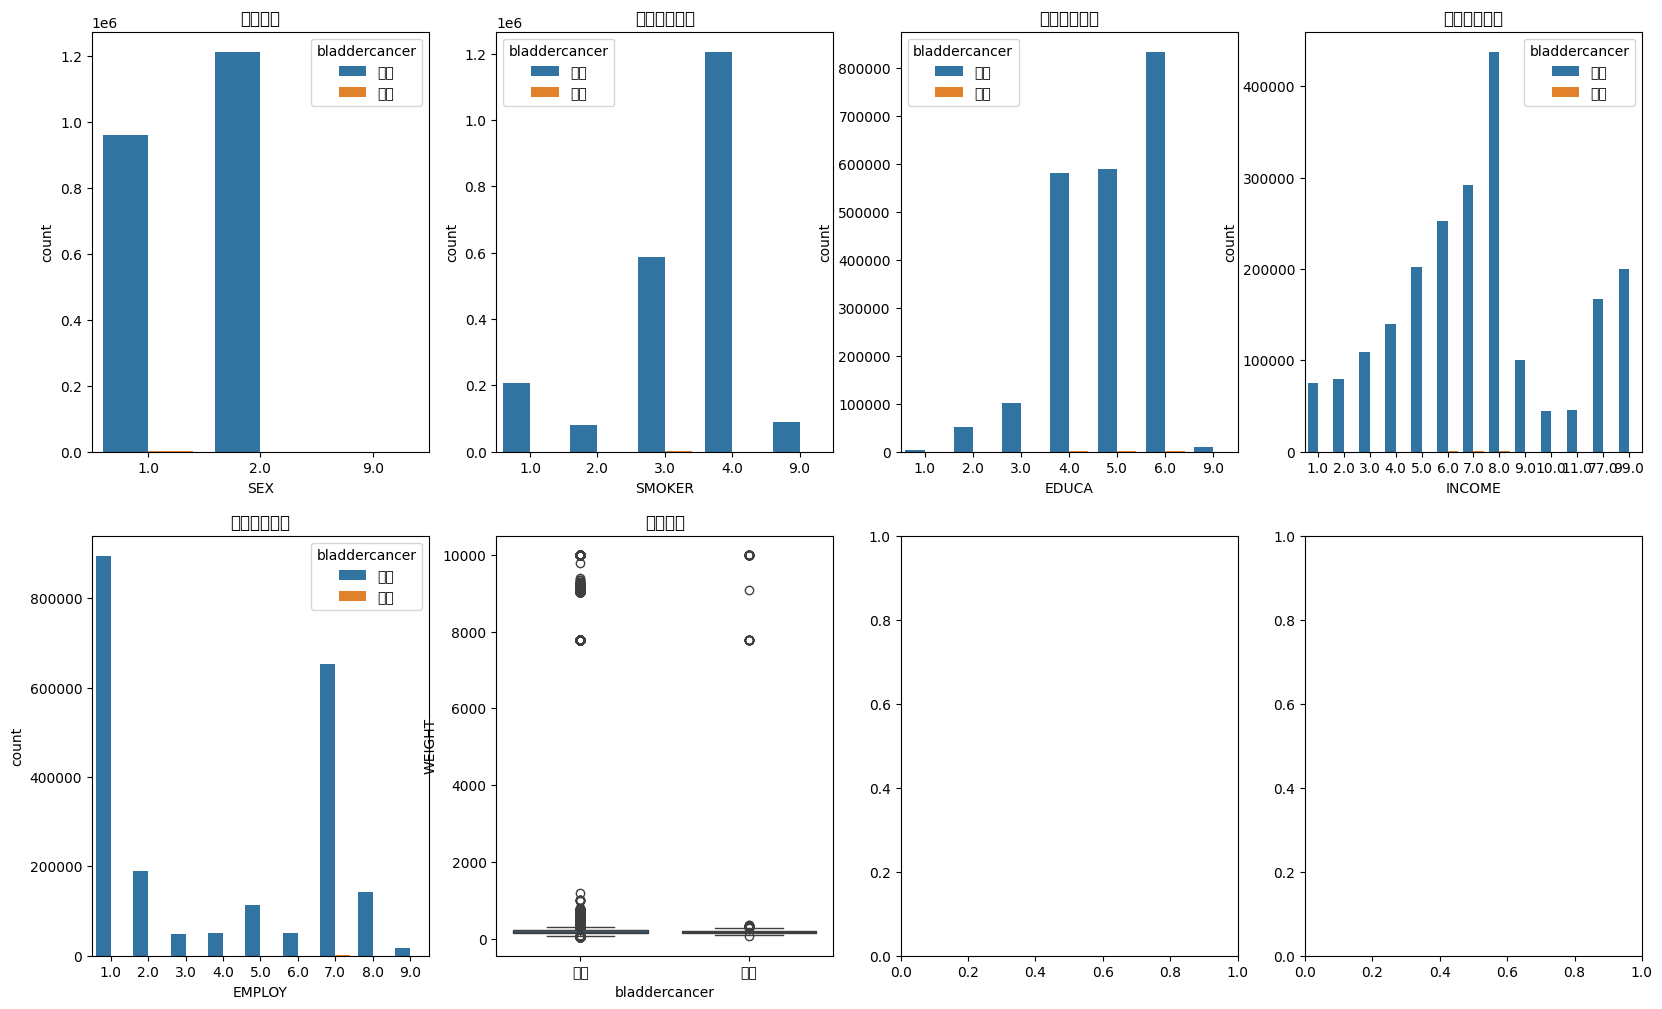

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择需要绘制的列
columns_to_plot = ['SEX', 'AGE', 'WEIGHT', 'SMOKER', 'EDUCA', 'INCOME', 'EMPLOY']

# 按照bladdercancer（是否患膀胱癌）列进行分组
baseline_df['bladdercancer'] = baseline_df['bladdercancer'].map({0: '未患', 1: '患病'})

# 创建绘图区域
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

# 绘制性别分布图
sns.countplot(data=baseline_df, x='SEX', hue='bladdercancer', ax=axes[0])
axes[0].set_title('性别分布')

# 绘制吸烟情况分布图
sns.countplot(data=baseline_df, x='SMOKER', hue='bladdercancer', ax=axes[1])
axes[1].set_title('吸烟情况分布')

# 绘制教育水平分布图
sns.countplot(data=baseline_df, x='EDUCA', hue='bladdercancer', ax=axes[2])
axes[2].set_title('教育水平分布')

# 绘制收入分布图
sns.countplot(data=baseline_df, x='INCOME', hue='bladdercancer', ax=axes[3])
axes[3].set_title('收入水平分布')

# 绘制工作状态分布图
sns.countplot(data=baseline_df, x='EMPLOY', hue='bladdercancer', ax=axes[4])
axes[4].set_title('工作状态分布')

# 绘制体重分布图（按膀胱癌分组）
sns.boxplot(data=baseline_df, x='bladdercancer', y='WEIGHT', ax=axes[5])
axes[5].set_title('体重分布')

# 绘制年龄分布图（按膀胱癌分组）
sns.boxplot(data=baseline_df, x='bladdercancer', y='AGE', ax=axes[6])
axes[6].set_title('年龄分布')

# 调整布局，防止图表重叠
plt.tight_layout()
plt.show()




统计基线情况
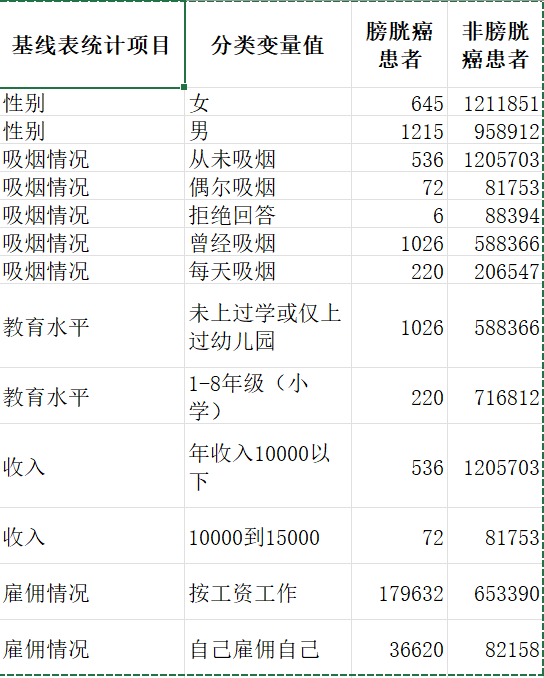


In [3]:
import pandas as pd
import os

def convert_age_group_to_average(age_group_code):
    """
    将 _AGEG5YR 编码值转换为对应年龄段的平均年龄。
    """
    age_map = {
        1: 21,   # 18 to 24 -> 平均年龄 21
        2: 27,   # 25 to 29 -> 平均年龄 27
        3: 32,   # 30 to 34 -> 平均年龄 32
        4: 37,   # 35 to 39 -> 平均年龄 37
        5: 42,   # 40 to 44 -> 平均年龄 42
        6: 47,   # 45 to 49 -> 平均年龄 47
        7: 52,   # 50 to 54 -> 平均年龄 52
        8: 57,   # 55 to 59 -> 平均年龄 57
        9: 62,   # 60 to 64 -> 平均年龄 62
        10: 67,  # 65 to 69 -> 平均年龄 67
        11: 72,  # 70 to 74 -> 平均年龄 72
        12: 77,  # 75 to 79 -> 平均年龄 77
        13: 85,  # 80 or older -> 平均年龄 85
        14: None  # Don’t know/Refused/Missing -> 缺失值
    }
    return age_map.get(age_group_code, None)  # 如果没有对应的编码，返回 None

def process_files_in_directory(directory_path):
    # Step 1: 获取目录中的所有 .XPT 文件
    files = [f for f in os.listdir(directory_path) if f.endswith('.XPT')]
    files.sort()  # 确保按文件名排序（按年份）

    final_data = pd.DataFrame()  # 初始化空的 DataFrame 用于存储最终结果
    
    for file in files:
        # Step 2: 读取每年的数据
        file_path = os.path.join(directory_path, file)
        raw_data = pd.read_sas(file_path, encoding="ISO-8859-1")  # 读取 SAS 文件（.XPT 格式）

        # Step 3: 提取 `SEQNO` 和 `_AGE80` 或 `_AGEG5YR` 列
        # 假设我们在 `_AGEG5YR` 列中找到年龄组编码
        age_column = '_AGEG5YR' if '_AGEG5YR' in raw_data.columns else '_AGE80'
        data = raw_data[['SEQNO', age_column]]

        # Step 4: 对 `_AGEG5YR` 列的编码进行转换
        data['Average_Age'] = data[age_column].apply(convert_age_group_to_average)

        # Step 5: 合并数据
        if final_data.empty:
            final_data = data
        else:
            final_data = pd.concat([final_data, data], ignore_index=True)
    
    return final_data

# 假设数据文件夹路径是 'data_folder'
directory_path = 'C:/Users/lyr/Desktop/brfss/data'  # 替换为实际数据文件夹路径

# Step 6: 处理文件夹内的所有文件
final_data = process_files_in_directory(directory_path)

print("数据处理成功！")


C:\Users\lyr\AppData\Local\Temp\ipykernel_26336\1976393237.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average_Age'] = data[age_column].apply(convert_age_group_to_average)
C:\Users\lyr\AppData\Local\Temp\ipykernel_26336\1976393237.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average_Age'] = data[age_column].apply(convert_age_group_to_average)
C:\Users\lyr\AppData\Local\Temp\ipykernel_26336\1976393237.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

数据处理成功！


C:\Users\lyr\AppData\Local\Temp\ipykernel_26336\1976393237.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average_Age'] = data[age_column].apply(convert_age_group_to_average)


In [4]:
print(final_data)

                SEQNO  _AGEG5YR  Average_Age
0        2009055575.0       8.0         57.0
1        2009056782.0      11.0         72.0
2        2009013651.0      10.0         67.0
3        2009063422.0       7.0         52.0
4        2009005830.0       5.0         42.0
...               ...       ...          ...
2172902    2023002064      10.0         67.0
2172903    2023002065       3.0         32.0
2172904    2023002066       7.0         52.0
2172905    2023002067      10.0         67.0
2172906    2023002068       6.0         47.0

[2172907 rows x 3 columns]


In [6]:
import pandas as pd
import pyreadstat

def convert_weight_to_kg(weight):
    """
    将体重从磅转换为公斤，并处理缺失值及无效数据。
    如果体重在9023-9352范围内，去掉开头的9。
    """
    if pd.isna(weight):
        return None
    # 处理字符串类型的体重数据
    try:
        # 如果是字符串，尝试去掉开头的9（只在特定范围内）
        if isinstance(weight, str) and weight.strip().isdigit():
            weight = float(weight)  # 转换为数字
        # 如果体重在9023-9352范围内，去掉开头的9
        if 9023 <= weight <= 9352:
            weight = float(str(int(weight))[1:])  # 去掉开头的9，转换为浮动数字
        # 如果是磅数范围
        if 50 <= weight <= 9000:
            return weight * 0.453592  # 磅转公斤
    except (ValueError, TypeError):
        # 捕捉无法转换的值，返回 None
        return None
    return None

def process_bladdercancer_file(file_path, final_data):
    """
    处理 brfss_bladdercancer.XPT 文件，进行体重转换并合并年龄信息。
    """
    # Step 1: 读取 brfss_bladdercancer.XPT 文件
    raw_data, meta = pyreadstat.read_xport(file_path, encoding="ISO-8859-1")  # 使用 pyreadstat 读取 XPT 文件
    
    # Step 2: 处理体重数据
    if 'WEIGHT' in raw_data.columns:
        weight_cleaned = raw_data['WEIGHT'].replace([7777, 9999, 0, 'BLANK'], pd.NA)
        raw_data['weight_kg'] = weight_cleaned.apply(convert_weight_to_kg)
    else:
        print("未找到 'WEIGHT' 列，请检查列名是否正确。")
    
    # Step 3: 合并 final_data 中的年龄信息
    # 假设 final_data 中已经有转换后的平均年龄（通过 _AGEG5YR）
    merged_data = pd.merge(raw_data, final_data[['SEQNO', 'Average_Age']], on='SEQNO', how='left')
    
    # Step 4: 返回合并后的数据
    return merged_data

# 定义 brfss_bladdercancer.XPT 文件路径和 final_data 的路径
bladdercancer_file_path = 'C:/Users/lyr/Desktop/brfss/merge/brfss_bladdercancer.XPT'  # 替换为实际路径


# Step 5: 读取 final_data 文件（假设 final_data 已经包含了年龄转换信息）
#final_data = pd.read_excel('final_data_with_average_ages.xlsx')  # 替换为实际路径

# Step 6: 处理 brfss_bladdercancer.XPT 文件
processed_data = process_bladdercancer_file(bladdercancer_file_path, final_data)
print(processed_data)
# Step 7: 保存结果为 .XPT 文件
# 保存为 XPT 文件



          DISPCODE         SEQNO  DIABETE  BPHIGH  TOLDHI  EDUCA  EMPLOY  \
0            120.0  2009055575.0      3.0     1.0     1.0    4.0     1.0   
1            120.0  2009056782.0      3.0     1.0     2.0    6.0     7.0   
2            120.0  2009013651.0      1.0     3.0     1.0    4.0     8.0   
3            120.0  2009063422.0      1.0     1.0     1.0    4.0     8.0   
4            120.0  2009005830.0      3.0     3.0     2.0    4.0     1.0   
...            ...           ...      ...     ...     ...    ...     ...   
66065904    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065905    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065906    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065907    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065908    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   

          INCOME  WEIGHT  SEX  CNCRTYPE  RFHYPE  RFHOL  SMOKER     BMI  \
0            

In [7]:
# 计算每个列的缺失值数量
missing_values = processed_data.isnull().sum()

# 计算每个列的缺失率
missing_percentage = (missing_values / len(processed_data)) * 100

# 将缺失值数量和缺失率组合成一个 DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# 打印各列的缺失率
print("各列的缺失率:")
print(missing_data)

各列的缺失率:
               Missing Values  Missing Percentage
DISPCODE                    0            0.000000
SEQNO                       0            0.000000
DIABETE                  1023            0.001548
BPHIGH                    531            0.000804
TOLDHI                5850699            8.855852
EDUCA                    2418            0.003660
EMPLOY                 340471            0.515351
INCOME                 958829            1.451322
WEIGHT                1326006            2.007096
SEX                         0            0.000000
CNCRTYPE             64525954           97.669063
RFHYPE                      0            0.000000
RFHOL                 7606241           11.513110
SMOKER                      0            0.000000
BMI                   5892321            8.918853
bladdercancer               0            0.000000
weight_kg             5043054            7.633368
Average_Age           1558832            2.359510


In [ ]:
output_file_path = 'C:/Users/lyr/Desktop/brfss/merge/brfss_bladdercancer_cl.XPT'  # 输出路径
print(processed_data)
pyreadstat.write_xport(processed_data, output_file_path)

print("数据处理并保存为 brfss_bladdercancer_cl.XPT 成功！")


          DISPCODE         SEQNO  DIABETE  BPHIGH  TOLDHI  EDUCA  EMPLOY  \
0            120.0  2009055575.0      3.0     1.0     1.0    4.0     1.0   
1            120.0  2009056782.0      3.0     1.0     2.0    6.0     7.0   
2            120.0  2009013651.0      1.0     3.0     1.0    4.0     8.0   
3            120.0  2009063422.0      1.0     1.0     1.0    4.0     8.0   
4            120.0  2009005830.0      3.0     3.0     2.0    4.0     1.0   
...            ...           ...      ...     ...     ...    ...     ...   
66065904    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065905    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065906    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065907    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   
66065908    1100.0    2023002068      3.0     3.0     NaN    2.0     2.0   

          INCOME  WEIGHT  SEX  CNCRTYPE  RFHYPE  RFHOL  SMOKER     BMI  \
0            